1. 과적합
2. 노이즈
3. 특성과 상관관계

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# 스케일링
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [4]:
# 차수변경
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [5]:
# 잡음섞기
# np.random.random(len(x_train))
# np.random.random((2,2))
# np.random.random(x_train.shape)

x_train_with_noise_channels = np.concatenate([x_train,np.random.random(x_train.shape)],axis=1)

# 0픽셀을 추가
x_train_with_zero_channels = np.concatenate([x_train,np.zeros(x_train.shape)],axis=1)

In [6]:
# 훈련
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(512,activation='relu'), # input_shape=(x_train_with_noise_channels[1])),
        layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam', loss = tf.keras.losses.sparse_categorical_crossentropy,
                 metrics=['accuracy'])
    return model

In [8]:
model = build_model()
history_noise = model.fit(
    x_train_with_noise_channels,y_train,epochs=10,batch_size=128,validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.4586 - accuracy: 0.8625 - val_loss: 0.2716 - val_accuracy: 0.9248
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2381 - accuracy: 0.9297 - val_loss: 0.2084 - val_accuracy: 0.9408
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1627 - accuracy: 0.9519 - val_loss: 0.1964 - val_accuracy: 0.9417
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1181 - accuracy: 0.9650 - val_loss: 0.1570 - val_accuracy: 0.9510
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0898 - accuracy: 0.9735 - val_loss: 0.1516 - val_accuracy: 0.9549
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0642 - accuracy: 0.9815 - val_loss: 0.1398 - val_accuracy: 0.9578
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0455 - accuracy: 0.9871 - val_loss: 0.1325 - val_accuracy: 0.9611
Epoch 

In [9]:
model = build_model()
history_zeros = model.fit(
    x_train_with_zero_channels,y_train,epochs=10,batch_size=128,validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3001 - accuracy: 0.9146 - val_loss: 0.1565 - val_accuracy: 0.9576
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1268 - accuracy: 0.9634 - val_loss: 0.1152 - val_accuracy: 0.9659
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0842 - accuracy: 0.9751 - val_loss: 0.0919 - val_accuracy: 0.9727
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0591 - accuracy: 0.9830 - val_loss: 0.0828 - val_accuracy: 0.9758
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0434 - accuracy: 0.9876 - val_loss: 0.0794 - val_accuracy: 0.9763
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0331 - accuracy: 0.9908 - val_loss: 0.0771 - val_accuracy: 0.9757
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.0755 - val_accuracy: 0.9785
Epoch 

In [10]:
model = build_model()
history = model.fit(x_train,y_train,
                    epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2973 - accuracy: 0.9151 - val_loss: 0.1611 - val_accuracy: 0.9534
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1234 - accuracy: 0.9640 - val_loss: 0.1198 - val_accuracy: 0.9647
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9767 - val_loss: 0.0931 - val_accuracy: 0.9728
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0561 - accuracy: 0.9844 - val_loss: 0.0850 - val_accuracy: 0.9738
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0430 - accuracy: 0.9877 - val_loss: 0.0819 - val_accuracy: 0.9754
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0317 - accuracy: 0.9913 - val_loss: 0.0748 - val_accuracy: 0.9769
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0222 - accuracy: 0.9943 - val_loss: 0.0784 - val_accuracy: 0.9782
Epoch 

In [11]:
# 검증의 정확도 비교
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

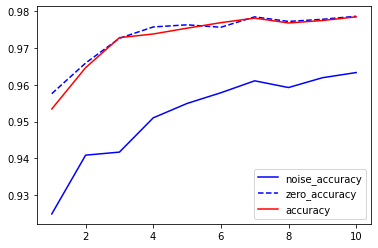

In [12]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs,val_acc_noise, 'b-', label = 'noise_accuracy')
plt.plot(epochs,val_acc_zeros, 'b--', label = 'zero_accuracy')
plt.plot(epochs,val_acc, label = 'accuracy', c='red')
plt.legend()
plt.show